In [1]:
import numpy as np
import matplotlib.pyplot as plt # plots
%matplotlib notebook

import scipy.io as sio

import sys
sys.path.append('D:/Work/dev/insitu_sim_python/insitu')
import lcurve_functions as lc

from controlsair import AlgControls, AirProperties, load_cfg, sph2cart

# Exterior Spherical NAH

Neste notebook vamos explorar uma técnica de medição de direcionalidade de fontes. Os dados usados são parte de um dataset maior disponível em: https://github.com/AppliedAcousticsChalmers/sound-source-directivities/tree/master. O artigo principal é dado em: https://ieeexplore.ieee.org/document/9257177.

O problema inverso é baseado em Esféricos Harmônicos ou no que chamamos de "Exterior Spherical NAH".

# Carregar e explorar o dataset

O dataset contem as seguintes informações:

- radii: raio da esfera medida
- phi: ângulos de azimute medidos
- theta: ângulos de azimute medidos
- fs: frequência de amostragem
- hts: respostas ao impulso medidas
- Hfs: respostas em frequência medidas
- N: odem de truncagem da decomposição

In [2]:
mat_contents = sio.loadmat('dataset_dir_Genelec_8351A.mat')
radii = mat_contents['radii'][0][0]
phi = mat_contents['phi'][0]
theta = mat_contents['theta'][0]
fs = mat_contents['fs'][0][0]
hts = mat_contents['hts']
Hfs_d = mat_contents['Hfs']
order = mat_contents['N'][0][0]

print("Radius = {} m".format(radii))
print("shape of theta: {}; and phi {}".format(theta.shape, phi.shape))
print("Fs = {} Hz".format(fs))
print("shape of hts: {}".format(hts.shape))
print("shape of Hfs: {}".format(Hfs_d.shape))
print("Order = {}".format(order))

Radius = 1.7 m
shape of theta: (366,); and phi (366,)
Fs = 48000 Hz
shape of hts: (2048, 366)
shape of Hfs: (2048, 366)
Order = 12


In [3]:
time = np.linspace(0, (hts.shape[0]-1)/fs, hts.shape[0])

### plote algumas respostas ao impulso

<IPython.core.display.Javascript object>


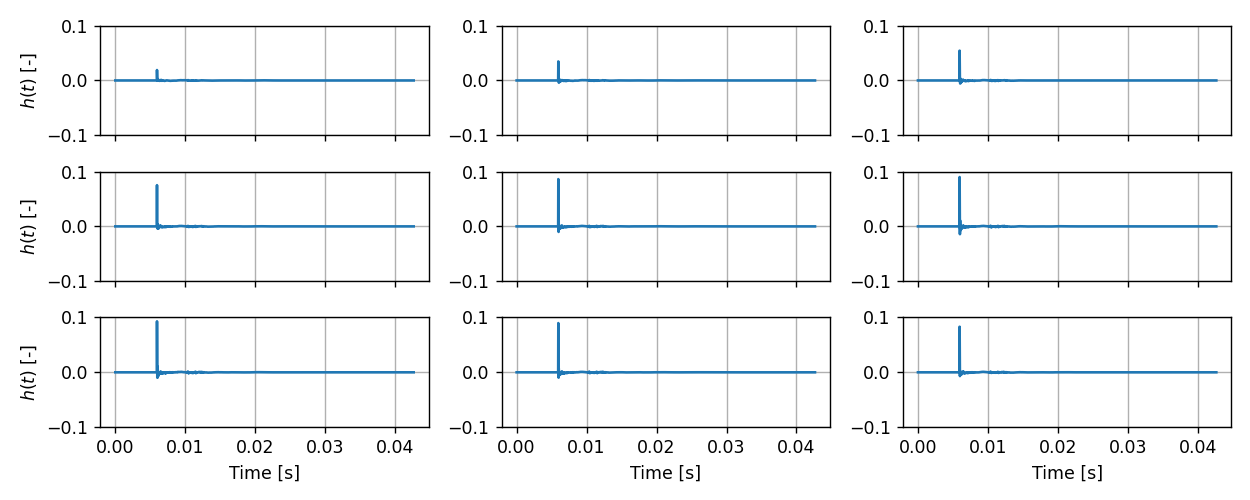

In [4]:
fig_shape = (3,3)

counter = 0
fig, ax = plt.subplots(fig_shape[0], fig_shape[1], figsize = (10,4), sharex = True)
for row in np.arange(fig_shape[0]):
    for col in np.arange(fig_shape[1]):
        ax[row,col].plot(time, hts[:,counter])
        ax[row,col].set_ylim((-0.1, 0.1))
        ax[row,col].grid()
        ax[2,col].set_xlabel('Time [s]')
        counter += 1
    ax[row,0].set_ylabel(r'$h(t)$ [-]')
plt.tight_layout()

### Computar FFTs

In [5]:
Hfs = np.fft.fft(hts, axis = 0)
freq = np.linspace(0, (Hfs.shape[0]-1)*fs/Hfs.shape[0], Hfs.shape[0])

<IPython.core.display.Javascript object>


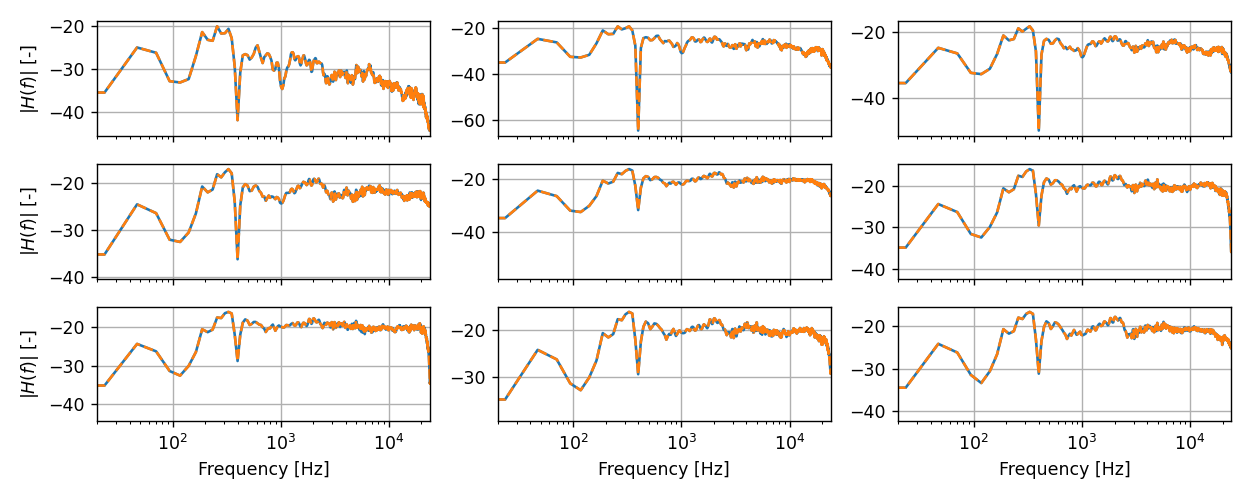

In [6]:
fig_shape = (3,3)

counter = 0
fig, ax = plt.subplots(fig_shape[0], fig_shape[1], figsize = (10,4), sharex = True)
for row in np.arange(fig_shape[0]):
    for col in np.arange(fig_shape[1]):
        ax[row,col].semilogx(freq, 20*np.log10(np.abs(Hfs[:,counter])))
        ax[row,col].semilogx(freq, 20*np.log10(np.abs(Hfs_d[:,counter])), '--')
        ax[row,col].set_xlim((20, fs/2))
        ax[row,col].grid()
        ax[2,col].set_xlabel('Frequency [Hz]')
        counter += 1
    ax[row,0].set_ylabel(r'$|H(f)|$ [-]')
plt.tight_layout()

### Plotar alguns espectros para ângulos de azimute específicos e $\theta$ = 0$^{\circ}$

<IPython.core.display.Javascript object>


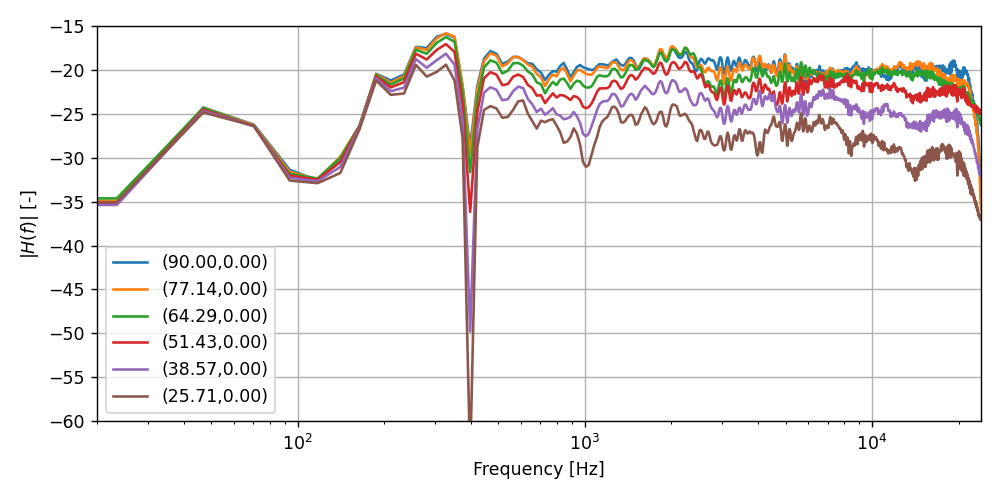

In [7]:
index2plot = [6, 5, 4, 3, 2, 1] #[6, 14, 16]#
theta_deg = [0, 25, 51]

plt.figure(figsize = (8, 4))
for i, idx in enumerate(index2plot):
    plt.semilogx(freq, 20*np.log10(np.abs(Hfs[:,idx])), label = '({:.2f},{:.2f})'.format(np.rad2deg(theta[idx]),np.rad2deg(phi[idx])))
plt.legend()
plt.xlim((20, fs/2))
plt.ylim((-60, -15))
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$|H(f)|$ [-]')
plt.tight_layout()

# Arranjo

In [8]:
x_coord, y_coord, z_coord = sph2cart(radii,theta, phi)

<IPython.core.display.Javascript object>


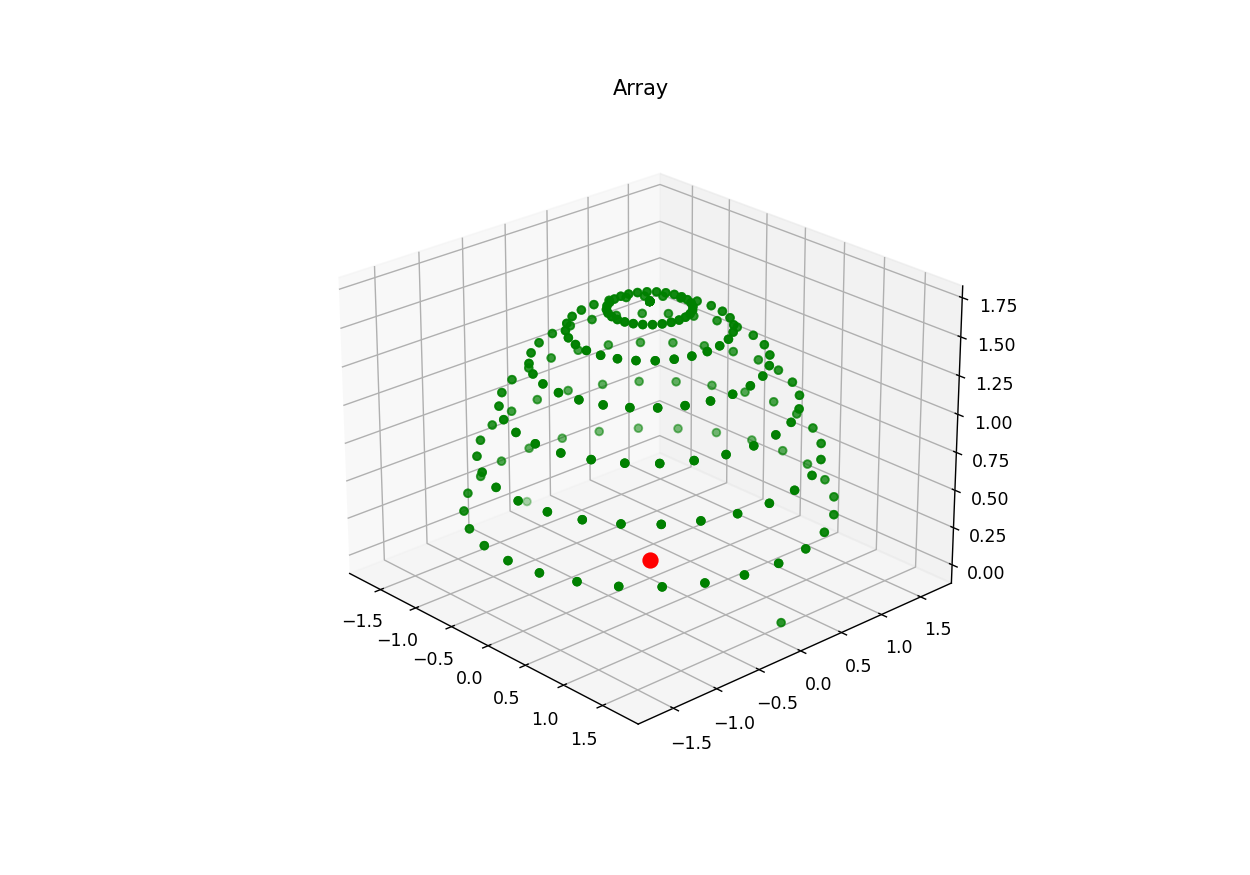

In [9]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x_coord, y_coord, z_coord, color = "green")
ax.scatter3D(0, 0, 0,  color = "red", s=70)

plt.title("Array");

In [73]:
id_theta =  np.where(np.rad2deg(theta) == 0)[0][0]

In [127]:
np.array([90-np.rad2deg(theta), np.rad2deg(phi)]).T

array([[ 77.14285714,   0.        ],
       [ 64.28571429,   0.        ],
       [ 51.42857143,   0.        ],
       [ 38.57142857,   0.        ],
       [ 25.71428571,   0.        ],
       [ 12.85714286,   0.        ],
       [  0.        ,   0.        ],
       [-12.85714286,   0.        ],
       [-25.71428571,   0.        ],
       [-38.57142857,   0.        ],
       [-51.42857143,   0.        ],
       [-64.28571429,   0.        ],
       [-77.14285714,   0.        ],
       [ 77.14285714,  12.85714286],
       [ 64.28571429,  12.85714286],
       [ 51.42857143,  12.85714286],
       [ 38.57142857,  12.85714286],
       [ 25.71428571,  12.85714286],
       [ 12.85714286,  12.85714286],
       [  0.        ,  12.85714286],
       [-12.85714286,  12.85714286],
       [-25.71428571,  12.85714286],
       [-38.57142857,  12.85714286],
       [-51.42857143,  12.85714286],
       [-64.28571429,  12.85714286],
       [-77.14285714,  12.85714286],
       [ 77.14285714,  25.71428571],
 

In [76]:
np.rad2deg(theta)

array([ 12.85714286,  25.71428571,  38.57142857,  51.42857143,
        64.28571429,  77.14285714,  90.        , 102.85714286,
       115.71428571, 128.57142857, 141.42857143, 154.28571429,
       167.14285714,  12.85714286,  25.71428571,  38.57142857,
        51.42857143,  64.28571429,  77.14285714,  90.        ,
       102.85714286, 115.71428571, 128.57142857, 141.42857143,
       154.28571429, 167.14285714,  12.85714286,  25.71428571,
        38.57142857,  51.42857143,  64.28571429,  77.14285714,
        90.        , 102.85714286, 115.71428571, 128.57142857,
       141.42857143, 154.28571429, 167.14285714,  12.85714286,
        25.71428571,  38.57142857,  51.42857143,  64.28571429,
        77.14285714,  90.        , 102.85714286, 115.71428571,
       128.57142857, 141.42857143, 154.28571429, 167.14285714,
        12.85714286,  25.71428571,  38.57142857,  51.42857143,
        64.28571429,  77.14285714,  90.        , 102.85714286,
       115.71428571, 128.57142857, 141.42857143, 154.28